# 1. Abrir el archivo de datos y leer la información general

In [14]:
# Importar librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats as st
import math as mth
import scipy.stats as stats
import plotly.express as px

In [15]:
# Cargar el Dataset y mostrarlo
logs = pd.read_csv('C:/Users/chino/Downloads/csvs_sprints/logs_exp_us.csv', sep=',')
display(logs.head())
print(logs.info())

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None


# 2 Preparar los datos para el análisis

In [16]:
# Cambiar nombre de las columnas
logs.columns = ['event_name', 'device_id_hash', 'event_timestamp', 'expld']

In [17]:
# Comprobar valores nulos
print(logs.isnull().sum())
print()
#comprobar valores duplicados
print(logs.duplicated().sum())

event_name         0
device_id_hash     0
event_timestamp    0
expld              0
dtype: int64

413


In [18]:
# Mostrar valores duplicados
print(logs[logs.duplicated()])

                     event_name       device_id_hash  event_timestamp  expld
453            MainScreenAppear  5613408041324010552       1564474784    248
2350           CartScreenAppear  1694940645335807244       1564609899    248
3573           MainScreenAppear   434103746454591587       1564628377    248
4076           MainScreenAppear  3761373764179762633       1564631266    247
4803           MainScreenAppear  2835328739789306622       1564634641    248
...                         ...                  ...              ...    ...
242329         MainScreenAppear  8870358373313968633       1565206004    247
242332  PaymentScreenSuccessful  4718002964983105693       1565206005    247
242360  PaymentScreenSuccessful  2382591782303281935       1565206049    246
242362         CartScreenAppear  2382591782303281935       1565206049    246
242635         MainScreenAppear  4097782667445790512       1565206618    246

[413 rows x 4 columns]


In [19]:
# Eliminar valores duplicados conservando el primer valor
logs = logs.drop_duplicates(keep='first')
# Comprobar si se han eliminado los duplicados
print(logs.duplicated().sum())

0


In [20]:
# Convertir la columna event_timestamp a tipo datetime
logs['event_timestamp'] = pd.to_datetime(logs['event_timestamp'], unit='s')

In [21]:
# Mostrar los cambios
print(logs.info())
display(logs.head())

<class 'pandas.core.frame.DataFrame'>
Index: 243713 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       243713 non-null  object        
 1   device_id_hash   243713 non-null  int64         
 2   event_timestamp  243713 non-null  datetime64[ns]
 3   expld            243713 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 9.3+ MB
None


,event_name,device_id_hash,event_timestamp,expld
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248


In [22]:
# Agrega una columna con la fecha
logs['date'] = logs['event_timestamp'].dt.date
# Agrega una columna con la hora
logs['time'] = logs['event_timestamp'].dt.time

In [23]:
display(logs.head(10))


,event_name,device_id_hash,event_timestamp,expld,date,time
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25,04:43:36
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25,11:11:42
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11:28:47
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11:28:47
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25,11:48:42
5,CartScreenAppear,6217807653094995999,2019-07-25 11:48:43,248,2019-07-25,11:48:43
6,OffersScreenAppear,8351860793733343758,2019-07-25 14:50:42,246,2019-07-25,14:50:42
7,MainScreenAppear,5682100281902512875,2019-07-25 20:14:37,246,2019-07-25,20:14:37
8,MainScreenAppear,1850981295691852772,2019-07-25 20:31:42,247,2019-07-25,20:31:42
9,MainScreenAppear,5407636962369102641,2019-07-26 03:35:12,246,2019-07-26,03:35:12


# 3 Estudiar y comprobar los datos

## 3.1 ¿Cuántos eventos hay en los registros?

In [24]:
# Número de eventos hay en los registros
print(f"Total de eventos: {logs.shape[0]}")
event_name = logs['event_name'].value_counts()
# mostrar los eventos por nombre
print()
print(event_name)

Total de eventos: 243713

event_name
MainScreenAppear           119101
OffersScreenAppear          46808
CartScreenAppear            42668
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: count, dtype: int64


## 3.2 ¿Cuántos usuarios hay en los registros?

In [25]:
# Número de usarios hay en los registros
print(f"Total de usuarios: {logs['device_id_hash'].nunique()}")


Total de usuarios: 7551


## 3.3  ¿Cuál es el promedio de eventos por usuario?

In [26]:
# Promedio de eventos por usuario
events_per_user = logs.groupby('device_id_hash')['event_name'].count()
events_per_user = events_per_user.mean()
print(f"Promedio de eventos por usuario: {events_per_user:.2f}")

Promedio de eventos por usuario: 32.28


## 3.4 ¿Qué periodo de tiempo cubren los datos?

In [27]:
# Encontrar la fecha maxima y minima
print("Período de tiempo cubierto por los datos:")
print(f"Desde: {logs['event_timestamp'].min()}")
print(f"Hasta: {logs['event_timestamp'].max()}")
print(f"Duración: {logs['event_timestamp'].max() - logs['event_timestamp'].min()}")

Período de tiempo cubierto por los datos:
Desde: 2019-07-25 04:43:36
Hasta: 2019-08-07 21:15:17
Duración: 13 days 16:31:41


### 3.4.1 Traza un histograma por fecha y hora.

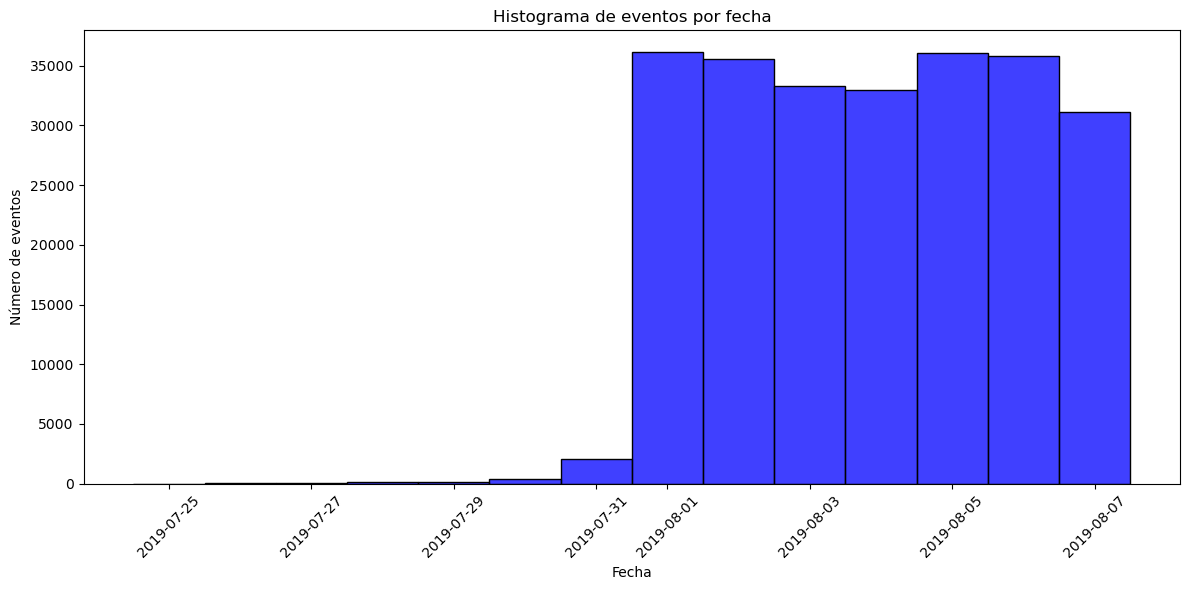

In [28]:
# Histograma de eventos por fecha
plt.figure(figsize=(12, 6)) 
sns.histplot(logs['date'], bins=30, kde=False, color='blue')
plt.title('Histograma de eventos por fecha')
plt.xlabel('Fecha')
plt.ylabel('Número de eventos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3.4.2 ¿Qué periodo representan realmente los datos?

In [29]:
# Filtrar datos a partir del 01/08/2019
logs_filtered = logs[logs['event_timestamp'] >= '2019-08-01']
print("Período de tiempo cubierto por los datos:")
print(f"Desde: {logs_filtered['event_timestamp'].min()}")
print(f"Hasta: {logs_filtered['event_timestamp'].max()}")
print(f"Duración: {logs_filtered['event_timestamp'].max() - logs_filtered['event_timestamp'].min()}")

Período de tiempo cubierto por los datos:
Desde: 2019-08-01 00:07:28
Hasta: 2019-08-07 21:15:17
Duración: 6 days 21:07:49


### 3.4.3 ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?

In [30]:
# Diferencia de registos entre logs y logs_filtered
print(f"Número de registros en logs: {logs.shape[0]}")
print(f"Número de registros en logs_filtered: {logs_filtered.shape[0]}")

Número de registros en logs: 243713
Número de registros en logs_filtered: 240887


In [31]:
logs1 = logs.shape[0]
logs2 = logs_filtered.shape[0]
# calcular la diferencia de registros
difference = logs1 - logs2
print(f"Diferencia de registros: {difference}")

Diferencia de registros: 2826


Perdimos un total de 2826 regitros,  podría sonar a que son muchos, pero de un total de 240887, es apenas un 1% de los datos 

### 3.4.4 Asegúrate de tener usuarios de los tres grupos experimentales.

Conteo de eventos por tipo de exploración:
expld
248    84563
246    79302
247    77022
Name: count, dtype: int64


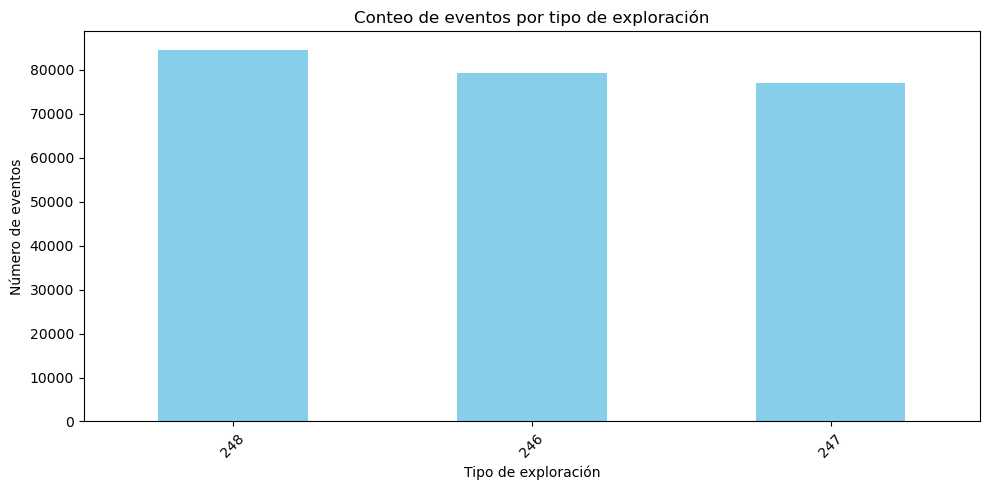

In [32]:
# Mostrar la cantidad de usarios por grupo experimental aun presentes em el df filtrado
print("Conteo de eventos por tipo de exploración:")
print(logs_filtered['expld'].value_counts())
logs_filtered['expld']. value_counts().plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Conteo de eventos por tipo de exploración')
plt.xlabel('Tipo de exploración')
plt.ylabel('Número de eventos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 4 Estudiar el embudo de eventos

## 4.1 Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.

In [33]:
# Ordenar eventos por frecuencia
event_counts = logs_filtered['event_name'].value_counts().reset_index()
event_counts.columns = ['event_name', 'count']
# Mostrar los eventos ordenados por frecuencia
print("Eventos ordenados por frecuencia:")
print(event_counts)

Eventos ordenados por frecuencia:
                event_name   count
0         MainScreenAppear  117328
1       OffersScreenAppear   46333
2         CartScreenAppear   42303
3  PaymentScreenSuccessful   33918
4                 Tutorial    1005


## 4.2 Encuentra la cantidad de usuarios que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios. Calcula la proporción de usuarios que realizaron la acción al menos una vez.

In [34]:
# Cantidad de usarios que han realizado cada evento
user_counts = logs_filtered.groupby('event_name')['device_id_hash'].nunique().reset_index()
user_counts.columns = ['event_name', 'unique_users']
# Mostrar la cantidad de usuarios que han realizado cada evento
print("Cantidad de usuarios que han realizado cada evento:")
print(user_counts)

Cantidad de usuarios que han realizado cada evento:
                event_name  unique_users
0         CartScreenAppear          3734
1         MainScreenAppear          7419
2       OffersScreenAppear          4593
3  PaymentScreenSuccessful          3539
4                 Tutorial           840


In [35]:
# Ordena los eventos por el número de usuarios
user_counts_sorted = user_counts.sort_values(by='unique_users', ascending=False)
# Mostrar los eventos ordenados por el número de usuarios   
print("Eventos ordenados por el número de usuarios:")
print(user_counts_sorted)

Eventos ordenados por el número de usuarios:
                event_name  unique_users
1         MainScreenAppear          7419
2       OffersScreenAppear          4593
0         CartScreenAppear          3734
3  PaymentScreenSuccessful          3539
4                 Tutorial           840


In [36]:
# Calcula la propoción de usuarios que realizarón cada evento
user_counts_sorted['proportion'] = user_counts_sorted['unique_users'] / logs_filtered['device_id_hash'].nunique()
# Mostrar la proporción de usuarios que realizaron cada evento
print("Proporción de usuarios que realizaron cada evento:")
print(user_counts_sorted[['event_name', 'proportion']])


Proporción de usuarios que realizaron cada evento:
                event_name  proportion
1         MainScreenAppear    0.984736
2       OffersScreenAppear    0.609636
0         CartScreenAppear    0.495620
3  PaymentScreenSuccessful    0.469737
4                 Tutorial    0.111495


C:\Users\chino\AppData\Local\Temp\ipykernel_27912\2217955059.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='event_name', y='proportion', data=user_counts_sorted, palette='viridis')


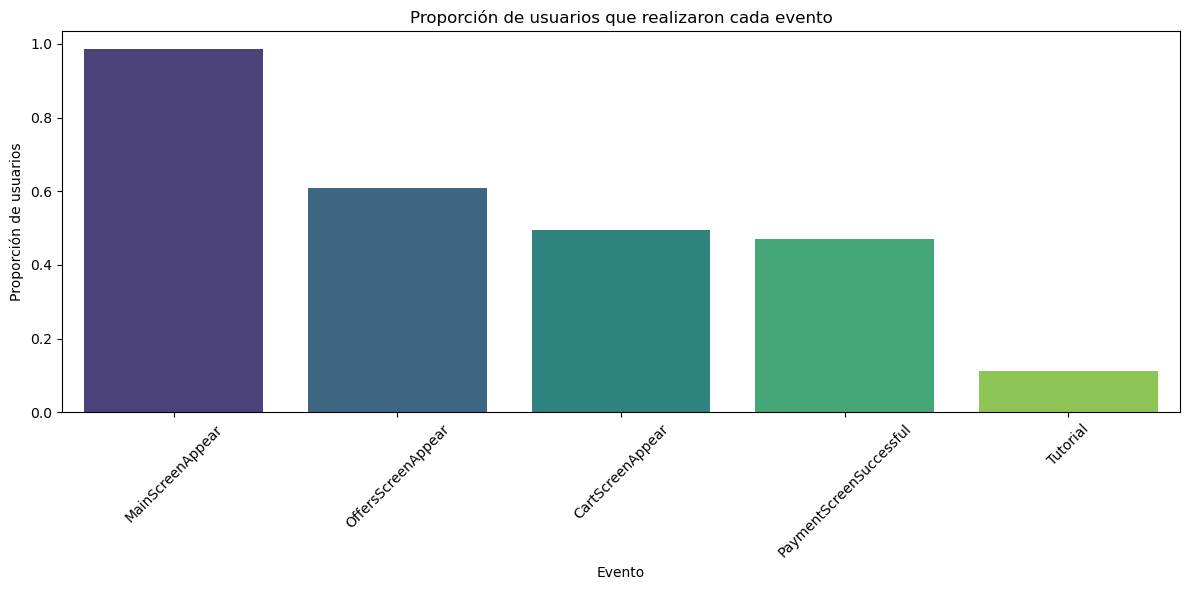

In [37]:
 # Visualizar la proporción de usuarios que realizaron cada evento
plt.figure(figsize=(12, 6))
sns.barplot(x='event_name', y='proportion', data=user_counts_sorted, palette='viridis')
plt.title('Proporción de usuarios que realizaron cada evento')
plt.xlabel('Evento')
plt.ylabel('Proporción de usuarios')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4.3 ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.

Teoricamente la secuencia de eventos deberia de ser la sigueinte:

1) MainScreenAppear (el usuario ve la pagina principal)
2) OfferScreenAppear (el usario ve o llega a la pagina de ofertas)
3) CartScreenAppear ( el usario agrega productos a su carrito y ve la pagina del carrito)
4) PaymentScreenSuccesful ( el usuario ve la pagina de pago realizado correctamente)

Me baso en esa secuencia, ya que la proporción de usarios que ve la pagina principal es de casi 1 (0.98) dando una relación casi perfecta entre la frecuencia de la acción y el numero de usarios que realizan esa acción

No todas  las acciones son parte de una sola secuencia ya que la pantalla de tutorial teoricamente deberia ser visitada con la misma frecuencia que la pagina inicial si se desea aprender a hacer un pedido.

Supongo que la pagina de tutorial es opcional y solo es utilizada si nunca se ha pedido un producto por una tienda online. De alli su baja proporción de uso por parte de los usuarios.






## 4.4 Utiliza el embudo de eventos para encontrar la proporción de usuarios que pasan de una etapa a la siguiente. Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B.

In [38]:
# Ordenar los eventos de cada usuario por timestamp
logs_filtered_sorted = logs_filtered.sort_values(by=['device_id_hash', 'event_timestamp'])

# Definir la secuencia de eventos de interés 
funnel_sequence = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']

# Crear un DataFrame para cada evento en la secuencia, conteniendo solo los usuarios que han realizado ese evento
users_in_sequence = {}
for event in funnel_sequence:
    users_in_sequence[event] = logs_filtered_sorted[logs_filtered_sorted['event_name'] == event]['device_id_hash'].unique()

# Calcular el número de usuarios únicos en cada etapa del embudo
funnel_users_count = {}
for event in funnel_sequence:
    funnel_users_count[event] = len(users_in_sequence[event])

# Calcular la proporción de usuarios que pasan de una etapa a la siguiente
funnel_conversion = {}
previous_event_users = None
for i, event in enumerate(funnel_sequence):
    current_event_users = users_in_sequence[event]
    if i == 0:
        # La primera etapa no tiene una etapa anterior para calcular la conversión paso a paso
        funnel_conversion[event] = 1.0 # O se puede considerar la proporción respecto al total de usuarios en los datos filtrados
        total_users_filtered = logs_filtered['device_id_hash'].nunique()
        print(f"Etapa: {event}, Usuarios: {funnel_users_count[event]}, Proporción Total: {funnel_users_count[event] / total_users_filtered:.2f}")
    else:
        # Usuarios que realizaron tanto el evento anterior como el actual
        users_transition = np.intersect1d(previous_event_users, current_event_users)
        funnel_conversion[event] = len(users_transition) / len(previous_event_users) if len(previous_event_users) > 0 else 0
        print(f"Etapa: {event}, Usuarios: {funnel_users_count[event]}, Conversión (desde {funnel_sequence[i-1]}): {funnel_conversion[event]:.2f}")

    previous_event_users = current_event_users

Etapa: MainScreenAppear, Usuarios: 7419, Proporción Total: 0.98
Etapa: OffersScreenAppear, Usuarios: 4593, Conversión (desde MainScreenAppear): 0.60
Etapa: CartScreenAppear, Usuarios: 3734, Conversión (desde OffersScreenAppear): 0.80
Etapa: PaymentScreenSuccessful, Usuarios: 3539, Conversión (desde CartScreenAppear): 0.95


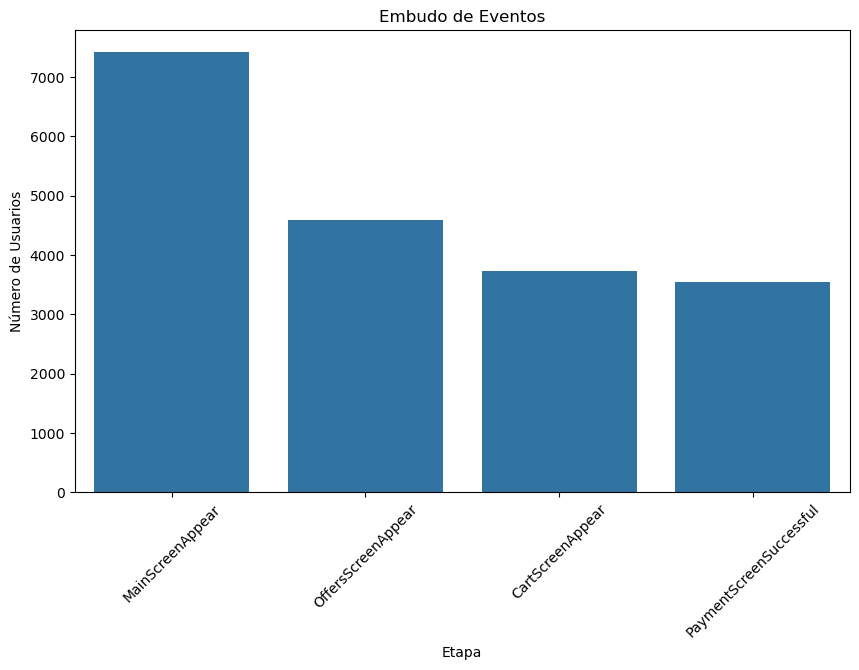

In [39]:
# Visualizar el embudo
funnel_data = pd.DataFrame({'stage': funnel_sequence,'users': [funnel_users_count[event] for event in funnel_sequence]})

# Calcular las tasas de conversión de cada paso para la visualización
funnel_data['conversion_rate'] = funnel_data['users'].pct_change().fillna(1) # Cambio porcentual entre etapas
funnel_data['conversion_rate_from_start'] = funnel_data['users'] / funnel_data['users'].iloc[0] # Tasa desde el inicio

plt.figure(figsize=(10, 6))
sns.barplot(x='stage', y='users', data=funnel_data)
plt.title('Embudo de Eventos')
plt.xlabel('Etapa')
plt.ylabel('Número de Usuarios')
plt.xticks(rotation=45)
plt.show()


## 4.5 ¿En qué etapa pierdes más usuarios?

Podemos apreciar que en la etapa donde se pierden más usuarios es en el paso de MainScreenAppear a OfferScreenAppear o para simplificarlo podriamos llamrle la etapa 1 .

La perdida de usarios es de casi el 40%.

El resto de las estapas se mantienen muy sanas, ya que solo hay una perdida del 20%  de la etapa 2 que es de la pantalla de ofertas a la pantalla de agregar al carrito.

Y es aun más sana la etapa 3, ya que al pagar los productos del carrito, solo tenemos una perdida del 5% de los usarios.

Talves las ofertas del sitio no son tan buenas ya que solo logran atraer al 60% de los usarios que visitan la pagina principal.

## 4.6 ¿Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?

In [40]:
# Calcular el porcentaje de usuarios que completan todo el viaje desde su primer evento hasta el pago
total_users = logs_filtered['device_id_hash'].nunique()
users_completed_funnel = logs_filtered[logs_filtered['event_name'] == 'PaymentScreenSuccessful']['device_id_hash'].nunique()
completion_rate = users_completed_funnel / total_users if total_users > 0 else 0
print(f"Porcentaje de usuarios que completan todo el viaje desde su primer evento hasta el pago: {completion_rate:.2%}")

Porcentaje de usuarios que completan todo el viaje desde su primer evento hasta el pago: 46.97%


De todo el viaje del embudo, desde la pantalla principal hata llevar a cabo un pago, solo  un 47% de los usarios lo recorre hasta el final

# 5 Estudiar los resultados del experimento

## 5.1 ¿Cuántos usuarios hay en cada grupo?

Tenemos un total de:

79302 usuarios presnetes en el grupo control 246

77022 usuarios presentes en el grupo control 247

84563 usuarios presentes en el grupo experimental 248

Resultados obtenidos anterirormente del punto 3.4.4


## 5.2 Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.

In [41]:
# Filtrar los registros para las muestras 246 y 247
sample_A1 = logs_filtered[logs_filtered['expld'] == 246]
sample_A2 = logs_filtered[logs_filtered['expld'] == 247]


 Valor p de la prueba de Mann-Whitney: 0.8722
No hay una diferencia estadísticamente significativa entre las muestras 246 y 247 (prueba de Mann-Whitney U).


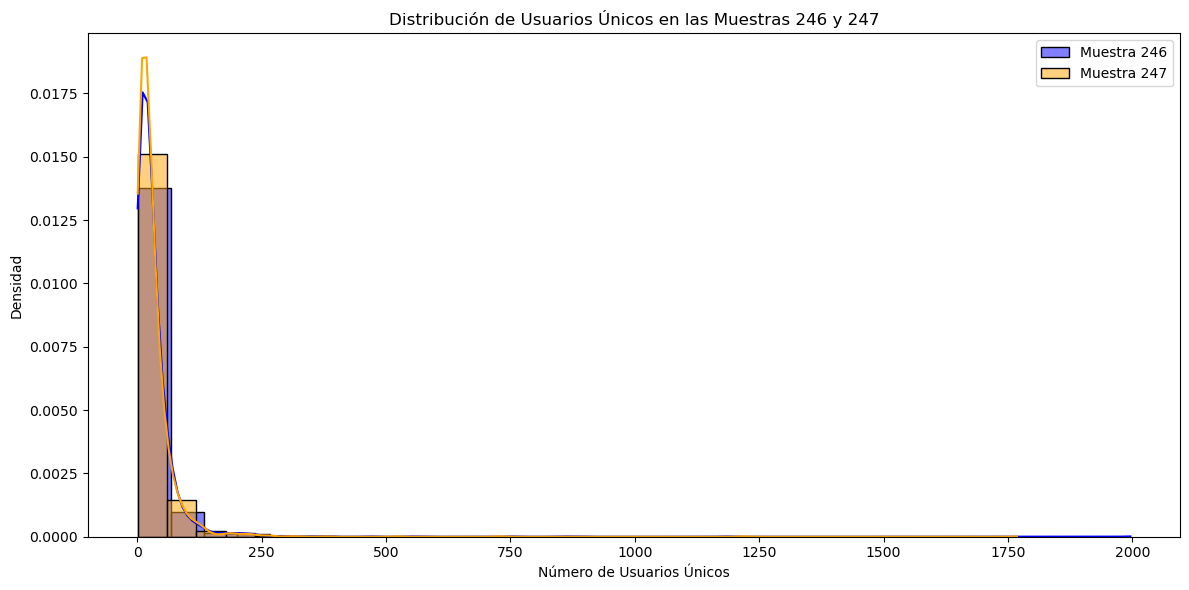

In [42]:
alpha = 0.05
# Hacer una prueba man whitney u para comparar las dos muestras
u_stat, p_value_mw = stats.mannwhitneyu(sample_A1['device_id_hash'].value_counts(), sample_A2['device_id_hash'].value_counts(), alternative='two-sided')
print(f" Valor p de la prueba de Mann-Whitney: {p_value_mw:.4f}")
# Interpretar el valor p de la prueba de Mann-Whitney U
if p_value_mw < alpha:
    print("Hay una diferencia estadísticamente significativa entre las muestras 246 y 247 (prueba de Mann-Whitney U).")
else:
    print("No hay una diferencia estadísticamente significativa entre las muestras 246 y 247 (prueba de Mann-Whitney U).")
# Visualizar la distribución de usuarios únicos en las muestras 246 y 247
plt.figure(figsize=(12, 6))
sns.histplot(sample_A1['device_id_hash'].value_counts(), bins=30, kde=True, color='blue', label='Muestra 246', stat='density')
sns.histplot(sample_A2['device_id_hash'].value_counts(), bins=30, kde=True, color='orange', label='Muestra 247', stat='density')
plt.title('Distribución de Usuarios Únicos en las Muestras 246 y 247')
plt.xlabel('Número de Usuarios Únicos')
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()

Esperabamos no encontrar diferencias estadísiticas entre ambas muestras,  ya que teoricamente los grupos control deben ser identicos para poder establecer una base A/A confiable en nuestra prueba.

## 5.3 Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos 

In [43]:
# Comparacion de grupos control 
ctrl_1 = logs_filtered[logs_filtered['expld'] == 246]
ctrl_2 = logs_filtered[logs_filtered['expld'] == 247]
# Filtrar los registros para los grupos de control (246 y 247) y el evento 'MainScreenAppear'
main_screen_246 = ctrl_1[ctrl_1['event_name'] == 'MainScreenAppear']
main_screen_247 = ctrl_2[ctrl_2['event_name'] == 'MainScreenAppear']

# Contar el número de usuarios únicos en cada grupo que realizaron el evento 'MainScreenAppear'
users_main_screen_246 = main_screen_246['device_id_hash'].nunique()
users_main_screen_247 = main_screen_247['device_id_hash'].nunique()

print(f"Cantidad de usuarios en el grupo 246 que realizaron 'MainScreenAppear': {users_main_screen_246}")
print(f"Cantidad de usuarios en el grupo 247 que realizaron 'MainScreenAppear': {users_main_screen_247}")

Cantidad de usuarios en el grupo 246 que realizaron 'MainScreenAppear': 2450
Cantidad de usuarios en el grupo 247 que realizaron 'MainScreenAppear': 2476


El numero de usarios como debe ser en ambos grupos controol es casi el mismo

In [44]:
# Calcular el número de usuarios únicos en cada muestra
users_246 = sample_A1['device_id_hash'].nunique()
users_247 = sample_A2['device_id_hash'].nunique()

# Calcula la proporción de usuarios que realizaron 'MainScreenAppear' en cada grupo de control
proportion_main_screen_246 = users_main_screen_246 / users_246 if users_246 > 0 else 0
proportion_main_screen_247 = users_main_screen_247 / users_247 if users_247 > 0 else 0

print(f"Proporción de usuarios que realizaron 'MainScreenAppear' en el grupo 246: {proportion_main_screen_246:.2%}")
print(f"Proporción de usuarios que realizaron 'MainScreenAppear' en el grupo 247: {proportion_main_screen_247:.2%}")

Proporción de usuarios que realizaron 'MainScreenAppear' en el grupo 246: 98.63%
Proporción de usuarios que realizaron 'MainScreenAppear' en el grupo 247: 98.53%


Evento mas popular con una proporción casi perfecta por ser la primera etapa del enbudo es el de "MainScreenAppear" y ambos grupos control son muy similares 

### 5.3.1 Comprueba si la diferencia entre los grupos es estadísticamente significativa

In [45]:
# Hacer una prueba de hipótesis para comparar el numero usuarios que realizaron 'MainScreenAppear' en los dos grupos de control
alpha = 0.05
u_stat_main_screen, p_value_main_screen = stats.mannwhitneyu(main_screen_246['device_id_hash'].value_counts(),main_screen_247['device_id_hash'].value_counts(),alternative='two-sided')
print(f" Valor p de la prueba de Mann-Whitney: {p_value_mw:.4f}")
# Interpretar el valor p de la prueba de Mann-Whitney U para 'MainScreenAppear'
if p_value_main_screen < alpha:
    print("Hay una diferencia estadísticamente significativa en la cantidad de usuarios que realizaron 'MainScreenAppear' entre los grupos 246 y 247.")
else:
    print("No hay una diferencia estadísticamente significativa en la cantidad de usuarios que realizaron 'MainScreenAppear' entre los grupos 246 y 247.")

 Valor p de la prueba de Mann-Whitney: 0.8722
No hay una diferencia estadísticamente significativa en la cantidad de usuarios que realizaron 'MainScreenAppear' entre los grupos 246 y 247.


In [68]:
# Mostrar la media y mediana de usuarios que realizaron 'MainScreenAppear' en cada grupo

print('Media grupo 246:', main_screen_246['device_id_hash'].value_counts().mean())
print('Media grupo 247:', main_screen_247['device_id_hash'].value_counts().mean())
print('Mediana grupo 246:', main_screen_246['device_id_hash'].value_counts().median())
print('Mediana grupo 247:', main_screen_247['device_id_hash'].value_counts().median())

Media grupo 246: 15.37795918367347
Media grupo 247: 15.787560581583199
Mediana grupo 246: 11.0
Mediana grupo 247: 11.0


Como era de esperar no hay diferencias estadisticas en esta etapa del embudo entre los dos grupos control.

Vamos por buen camino en establecer una base A-A solida para la prueba A-B

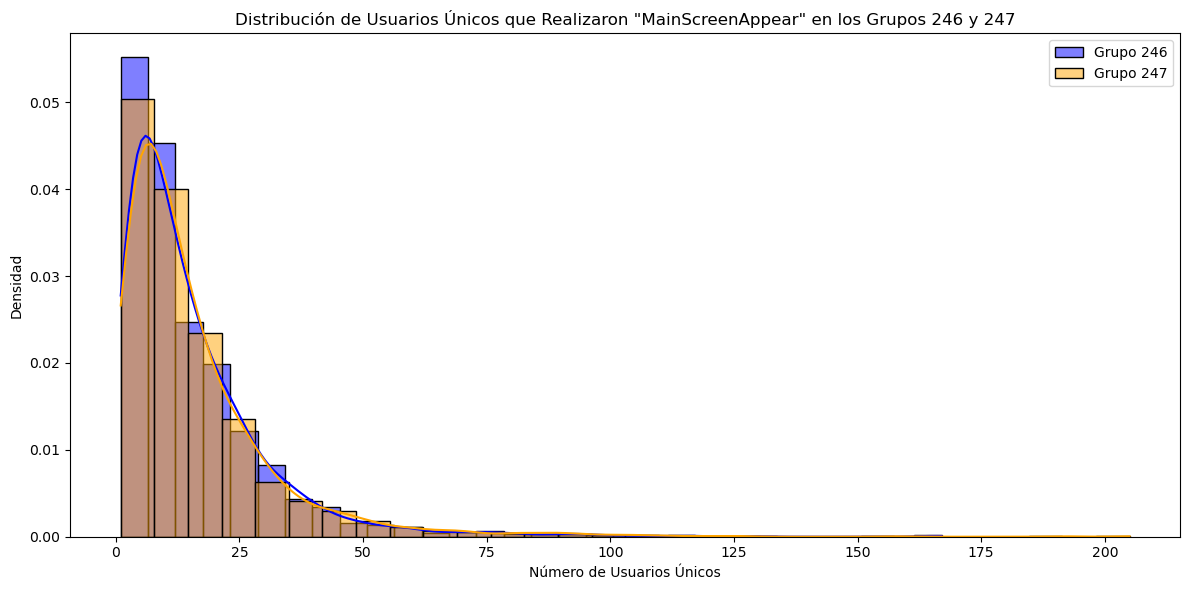

In [47]:
# Visualizar la distribución de usuarios únicos que realizaron 'MainScreenAppear' en los grupos de control
plt.figure(figsize=(12, 6))
sns.histplot(main_screen_246['device_id_hash'].value_counts(), bins=30, kde=True, color='blue', label='Grupo 246', stat='density')
sns.histplot(main_screen_247['device_id_hash'].value_counts(), bins=30, kde=True, color='orange', label='Grupo 247', stat='density')
plt.title('Distribución de Usuarios Únicos que Realizaron "MainScreenAppear" en los Grupos 246 y 247')
plt.xlabel('Número de Usuarios Únicos')
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()

### 5.3.2 Elaboració de la fuinción para el resto de eventos y su significancia estadística 

In [48]:
# Crear una funcion para continuar encontrando difrencias estadisticas entre crtl_1 y ctrl_2 con el resto de eventos
def compare_events(ctrl_1, ctrl_2, event_name):
  
    # Filtrar los registros para el evento específico
    event_ctrl_1 = ctrl_1[ctrl_1['event_name'] == event_name]
    event_ctrl_2 = ctrl_2[ctrl_2['event_name'] == event_name]

    # Contar el número de usuarios únicos en cada grupo que realizaron el evento
    users_event_ctrl_1 = event_ctrl_1['device_id_hash'].nunique()
    users_event_ctrl_2 = event_ctrl_2['device_id_hash'].nunique()

    print(f"Cantidad de usuarios en el grupo 246 que realizaron '{event_name}': {users_event_ctrl_1}")
    print(f"Cantidad de usuarios en el grupo 247 que realizaron '{event_name}': {users_event_ctrl_2}")

    # Calcular la proporción de usuarios que realizaron el evento en cada grupo de control
    proportion_event_ctrl_1 = users_event_ctrl_1 / users_246 if users_246 > 0 else 0
    proportion_event_ctrl_2 = users_event_ctrl_2 / users_247 if users_247 > 0 else 0

    print(f"Proporción de usuarios que realizaron '{event_name}' en el grupo 246: {proportion_event_ctrl_1:.2%}")
    print(f"Proporción de usuarios que realizaron '{event_name}' en el grupo 247: {proportion_event_ctrl_2:.2%}")

    # Hacer una prueba de hipótesis para comparar el número de usuarios que realizaron el evento en los dos grupos de control
    alpha = 0.05
    u_stat_event, p_value_event = stats.mannwhitneyu(
        event_ctrl_1['device_id_hash'].value_counts(),
        event_ctrl_2['device_id_hash'].value_counts(),
        alternative='two-sided'
    )
    
    print(f"Valor p de la prueba de Mann-Withney {p_value_event:.4f}")
    # Interpretar el valor p de la prueba de Mann-Whitney U para el evento
    if p_value_event < alpha:
        print(f"Hay una diferencia estadísticamente significativa en la cantidad de usuarios que realizaron '{event_name}' entre los grupos 246 y 247.")
    else:
        print(f"No hay una diferencia estadísticamente significativa en la cantidad de usuarios que realizaron '{event_name}' entre los grupos 246 y 247.")

In [49]:
#Llamar a la función para comparar eventos específicos
events_to_compare = [
    'OffersScreenAppear',
    'CartScreenAppear',
    'PaymentScreenSuccessful'
]
for event in events_to_compare:
    print(f"\nComparando el evento: {event}")
    # Check if both groups have users for this event before calling compare_events
    n1 = ctrl_1[ctrl_1['event_name'] == event]['device_id_hash'].nunique()
    n2 = ctrl_2[ctrl_2['event_name'] == event]['device_id_hash'].nunique()
    if n1 == 0 or n2 == 0:
        print(f"Uno de los grupos no tiene usuarios para el evento '{event}'. Se omite la comparación.")
        continue
    compare_events(ctrl_1, ctrl_2, event)


Comparando el evento: OffersScreenAppear
Cantidad de usuarios en el grupo 246 que realizaron 'OffersScreenAppear': 1542
Cantidad de usuarios en el grupo 247 que realizaron 'OffersScreenAppear': 1520
Proporción de usuarios que realizaron 'OffersScreenAppear' en el grupo 246: 62.08%
Proporción de usuarios que realizaron 'OffersScreenAppear' en el grupo 247: 60.49%
Valor p de la prueba de Mann-Withney 0.8436
No hay una diferencia estadísticamente significativa en la cantidad de usuarios que realizaron 'OffersScreenAppear' entre los grupos 246 y 247.

Comparando el evento: CartScreenAppear
Cantidad de usuarios en el grupo 246 que realizaron 'CartScreenAppear': 1266
Cantidad de usuarios en el grupo 247 que realizaron 'CartScreenAppear': 1238
Proporción de usuarios que realizaron 'CartScreenAppear' en el grupo 246: 50.97%
Proporción de usuarios que realizaron 'CartScreenAppear' en el grupo 247: 49.26%
Valor p de la prueba de Mann-Withney 0.4601
No hay una diferencia estadísticamente signifi

No existen diferencias estadisticamente significativas en ninguna etapa del embudo entre los dos grupos control, lo cual es una exclente noticia.

Podemos confirmar tener una base solida en la prueba A-A para la prueba A-B y podemos concluir que los grupos se dividieron correcta entre los grupos control



## 5.4 Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada


Primero establecemos las variables del grupo experimental de la misma forma que se hizó para los grupos control, para hacer mas facil el resto de analisis estadisticos para este grupo (248)

In [50]:
#Grupo experimental 248
expt_1 = logs_filtered[logs_filtered['expld'] == 248]
sample_B1 = logs_filtered[logs_filtered['expld'] == 248]
users_248 = sample_B1['device_id_hash'].nunique()
# Filtrar los registros para el grupo experimental y el evento 'MainScreenAppear'
main_screen_248 = expt_1[expt_1['event_name'] == 'MainScreenAppear']



Una ves ya listas las variables primero comprobemos de manera individual cada grupo control vs el grupo experimental si hay diferencias estadisiticamentes diferentes en el tamaño de los grupos

### 5.4.1 Llevar acabo comparaciones de de ambos grupos control VS grupo experimental por separado en tamaño de muestra y cada evento del embudo

Comparación de tamaño de muestra entre el grupo control 1 (246) VS grupo experimental (248)

 Valor p de la prueba de Mann-Whitney: 0.4263
No hay una diferencia estadísticamente significativa entre las muestras 246 y 248 (prueba de Mann-Whitney U).


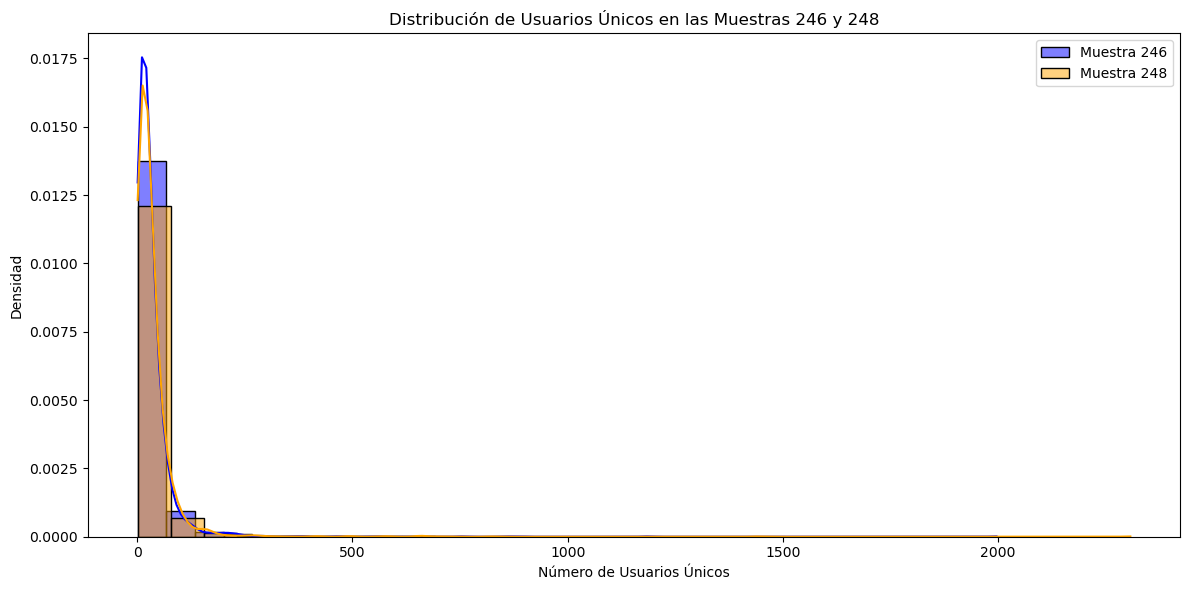

In [51]:
# Prueba Man whitney U para comparar grupo conmtrol 246 y grupo experimental 248
alpha = 0.05 
u_stat, p_value_mw = stats.mannwhitneyu(sample_A1['device_id_hash'].value_counts(), sample_B1['device_id_hash'].value_counts(), alternative='two-sided')
print(f" Valor p de la prueba de Mann-Whitney: {p_value_mw:.4f}")
# Interpretar el valor p de la prueba de Mann-Whitney U
if p_value_mw < alpha:
    print("Hay una diferencia estadísticamente significativa entre las muestras 246 y 248 (prueba de Mann-Whitney U).")
else:
    print("No hay una diferencia estadísticamente significativa entre las muestras 246 y 248 (prueba de Mann-Whitney U).")
# Visualizar la distribución de usuarios únicos en las muestras 246 y 247
plt.figure(figsize=(12, 6))
sns.histplot(sample_A1['device_id_hash'].value_counts(), bins=30, kde=True, color='blue', label='Muestra 246', stat='density')
sns.histplot(sample_B1['device_id_hash'].value_counts(), bins=30, kde=True, color='orange', label='Muestra 248', stat='density')
plt.title('Distribución de Usuarios Únicos en las Muestras 246 y 248')
plt.xlabel('Número de Usuarios Únicos')
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()

No parece haber diferencias significativas en el tamaño de los grupos, lo cual es bueno, así las comparaciones del resto de eventos sera equitativo y podremos si hay diferencias entre ellos. 

Comparación de tamaño de muestra entre el grupo control 2 (247) VS grupo experimental (248)

 Valor p de la prueba de Mann-Whitney: 0.3308
No hay una diferencia estadísticamente significativa entre las muestras 246 y 248 (prueba de Mann-Whitney U).


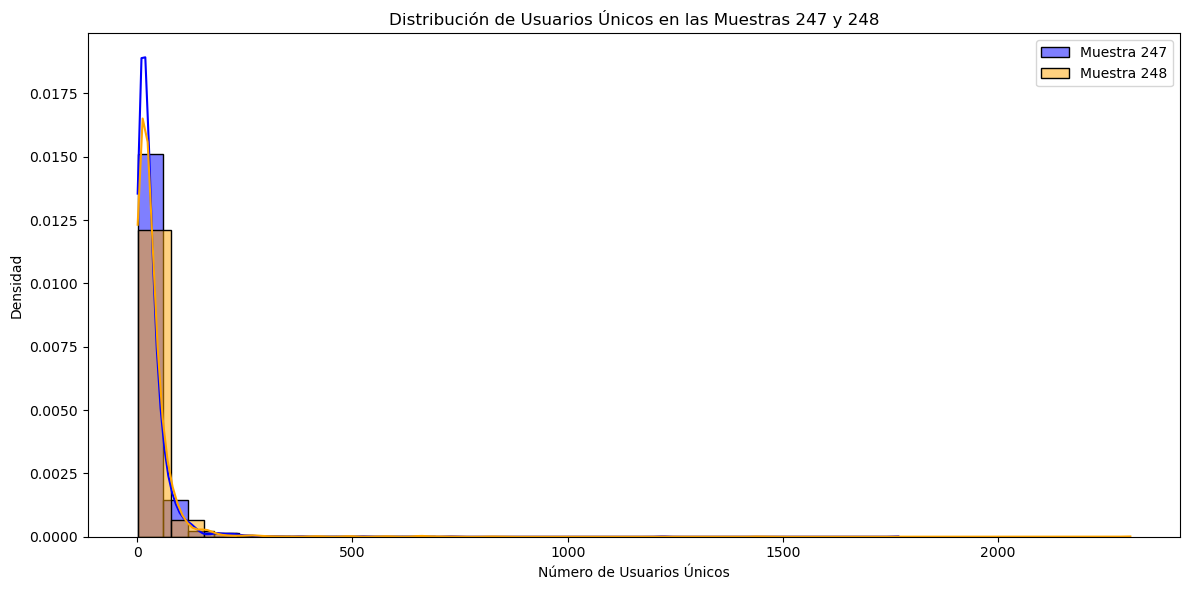

In [52]:
# Prueba Man whitney U para comparar grupo conmtrol 247 y grupo experimental 248
alpha = 0.05 
u_stat, p_value_mw = stats.mannwhitneyu(sample_A2['device_id_hash'].value_counts(), sample_B1['device_id_hash'].value_counts(), alternative='two-sided')
print(f" Valor p de la prueba de Mann-Whitney: {p_value_mw:.4f}")
# Interpretar el valor p de la prueba de Mann-Whitney U
if p_value_mw < alpha:
    print("Hay una diferencia estadísticamente significativa entre las muestras 246 y 248 (prueba de Mann-Whitney U).")
else:
    print("No hay una diferencia estadísticamente significativa entre las muestras 246 y 248 (prueba de Mann-Whitney U).")
# Visualizar la distribución de usuarios únicos en las muestras 246 y 247
plt.figure(figsize=(12, 6))
sns.histplot(sample_A2['device_id_hash'].value_counts(), bins=30, kde=True, color='blue', label='Muestra 247', stat='density')
sns.histplot(sample_B1['device_id_hash'].value_counts(), bins=30, kde=True, color='orange', label='Muestra 248', stat='density')
plt.title('Distribución de Usuarios Únicos en las Muestras 247 y 248')
plt.xlabel('Número de Usuarios Únicos')
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()

No parece haber diferencias significativas en el tamaño de los grupos entre el grupo control 2 y el experimental.

A pesar de que visualmente si parece haber una diferencia importante en el tamaño de los grupos.

Al igual que con los grupos control, tomemos la primera etapa del grupo experimental y veamos su proporción 

In [53]:
# Contar el número de usuarios únicos en el grupo experimental y el evento 'MainScreenAppear'
users_main_screen_248 = main_screen_248['device_id_hash'].nunique()
print(f"Cantidad de usuarios en el grupo experimental 248 que realizaron 'MainScreenAppear': {users_main_screen_248}")
# Calcular la proporción de usuarios que realizaron 'MainScreenAppear' en el grupo experimental
proportion_main_screen_248 = users_main_screen_248 / logs_filtered['device_id_hash'].nunique() if logs_filtered['device_id_hash'].nunique() > 0 else 0
print(f"Proporción de usuarios que realizaron 'MainScreenAppear' en el grupo experimental 248: {proportion_main_screen_248:.2%}")

Cantidad de usuarios en el grupo experimental 248 que realizaron 'MainScreenAppear': 2493
Proporción de usuarios que realizaron 'MainScreenAppear' en el grupo experimental 248: 33.09%


Seleccionando el evento mas popular de igual manera que los grupos control (MainScreenAppear) nos damos cuenta que en el grupo experimental hay una proporcion muy baja de usarios que empezaron esta etapa.

Primer resultado interesante, al parecer el grupo experimental no empezó en la etapa 1 de igual manera que los grupos control 

Comparación estadistica de la etapa 1 entre grupo control 1 VS experimental de la primera etapa

In [54]:
alpha = 0.05
u_stat_main_screen, p_value_main_screen = stats.mannwhitneyu(
    main_screen_246['device_id_hash'].value_counts(),
    main_screen_248['device_id_hash'].value_counts(),
    alternative='two-sided'
)
print(f" Valor p de la prueba de Mann-Whitney: {p_value_mw:.4f}")
# Interpretar el valor p de la prueba de Mann-Whitney U para 'MainScreenAppear'
if p_value_main_screen < alpha:
    print("Hay una diferencia estadísticamente significativa en la cantidad de usuarios que realizaron 'MainScreenAppear' entre los grupos 246 y 248.")
else:
    print("No hay una diferencia estadísticamente significativa en la cantidad de usuarios que realizaron 'MainScreenAppear' entre los grupos 246 y 248.")



 Valor p de la prueba de Mann-Whitney: 0.3308
No hay una diferencia estadísticamente significativa en la cantidad de usuarios que realizaron 'MainScreenAppear' entre los grupos 246 y 248.


Este resultado es aun mas interesante que el anterior a pesar de tener una prporción muy baja de usarios que iniciaron en la etapa 1 no existen diferencias estadisticas entre el grupo control 1 y el grupo experimental.

Talves por primera ves en todas mis pruebas estadsiticas realizadas a la fecha, será prudente bajar el grado de significancia para poder observar alguna diferencia importante entre los grupos.

Por el momento continuemos comparando las demás etapas entre el grupo control 1 y el experimental

In [55]:
# Crear una funcion para continuar encontrando difrencias estadisticas entre crtl_1 y ctrl_2 con el resto de eventos
def compare_events_exptl(ctrl_1, expt_1, event_name):
  
    # Filtrar los registros para el evento específico
    event_ctrl_1 = ctrl_1[ctrl_1['event_name'] == event_name]
    event_expt_1 = expt_1[expt_1['event_name'] == event_name]

    # Contar el número de usuarios únicos en cada grupo que realizaron el evento
    users_event_ctrl_1 = event_ctrl_1['device_id_hash'].nunique()
    users_event_expt_1 = event_expt_1['device_id_hash'].nunique()

    print(f"Cantidad de usuarios en el grupo 246 que realizaron '{event_name}': {users_event_ctrl_1}")
    print(f"Cantidad de usuarios en el grupo 248 que realizaron '{event_name}': {users_event_expt_1}")

    # Calcular la proporción de usuarios que realizaron el evento en cada grupo de control
    proportion_event_ctrl_1 = users_event_ctrl_1 / users_246 if users_246 > 0 else 0
    proportion_event_expt_1 = users_event_expt_1 / users_248 if users_248 > 0 else 0

    print(f"Proporción de usuarios que realizaron '{event_name}' en el grupo 246: {proportion_event_ctrl_1:.2%}")
    print(f"Proporción de usuarios que realizaron '{event_name}' en el grupo 248: {proportion_event_expt_1:.2%}")

    # Hacer una prueba de hipótesis para comparar el número de usuarios que realizaron el evento en los dos grupos de control
    alpha = 0.05
    u_stat_event, p_value_event = stats.mannwhitneyu(
        event_ctrl_1['device_id_hash'].value_counts(),
        event_expt_1['device_id_hash'].value_counts(),
        alternative='two-sided'
    )
    
    print(f"Valor p de la prueba de Mann-Withney {p_value_event:.4f}")
    # Interpretar el valor p de la prueba de Mann-Whitney U para el evento
    if p_value_event < alpha:
        print(f"Hay una diferencia estadísticamente significativa en la cantidad de usuarios que realizaron '{event_name}' entre los grupos 246 y 248.")
    else:
        print(f"No hay una diferencia estadísticamente significativa en la cantidad de usuarios que realizaron '{event_name}' entre los grupos 246 y 248.")

In [56]:
#Llamar a la función para comparar eventos específicos
events_to_compare = [
    'OffersScreenAppear',
    'CartScreenAppear',
    'PaymentScreenSuccessful'
]
for event in events_to_compare:
    print(f"\nComparando el evento: {event}")
    # Check if both groups have users for this event before calling compare_events
    n1 = ctrl_1[ctrl_1['event_name'] == event]['device_id_hash'].nunique()
    n2 = expt_1[expt_1['event_name'] == event]['device_id_hash'].nunique()
    if n1 == 0 or n2 == 0:
        print(f"Uno de los grupos no tiene usuarios para el evento '{event}'. Se omite la comparación.")
        continue
    compare_events_exptl(ctrl_1, expt_1, event)


Comparando el evento: OffersScreenAppear
Cantidad de usuarios en el grupo 246 que realizaron 'OffersScreenAppear': 1542
Cantidad de usuarios en el grupo 248 que realizaron 'OffersScreenAppear': 1531
Proporción de usuarios que realizaron 'OffersScreenAppear' en el grupo 246: 62.08%
Proporción de usuarios que realizaron 'OffersScreenAppear' en el grupo 248: 60.35%
Valor p de la prueba de Mann-Withney 0.7226
No hay una diferencia estadísticamente significativa en la cantidad de usuarios que realizaron 'OffersScreenAppear' entre los grupos 246 y 248.

Comparando el evento: CartScreenAppear
Cantidad de usuarios en el grupo 246 que realizaron 'CartScreenAppear': 1266
Cantidad de usuarios en el grupo 248 que realizaron 'CartScreenAppear': 1230
Proporción de usuarios que realizaron 'CartScreenAppear' en el grupo 246: 50.97%
Proporción de usuarios que realizaron 'CartScreenAppear' en el grupo 248: 48.48%
Valor p de la prueba de Mann-Withney 0.0949
No hay una diferencia estadísticamente signifi

La comparación entre el resto de etapas sigue siendo muy interesante. No parece haber diferencias significativas entre el resto de etapas y de hecho las proporciones de usarios en el resto de etapas es muy similar entre grupos, parece ser que el grupo experimental 248 mejoró sus numeros en las etapas subsecuentes a la primera 

#### 5.4.1.1 Comparación estadistica entre grupo control 2 y grupo experimental

Comparación estadistica de la etapa 1 entre grupo control 2 VS experimental

In [57]:
alpha = 0.05
u_stat_main_screen, p_value_main_screen = stats.mannwhitneyu(
    main_screen_247['device_id_hash'].value_counts(),
    main_screen_248['device_id_hash'].value_counts(),
    alternative='two-sided'
)
print(f" Valor p de la prueba de Mann-Whitney: {p_value_mw:.4f}")
# Interpretar el valor p de la prueba de Mann-Whitney U para 'MainScreenAppear'
if p_value_main_screen < alpha:
    print("Hay una diferencia estadísticamente significativa en la cantidad de usuarios que realizaron 'MainScreenAppear' entre los grupos 247 y 248.")
else:
    print("No hay una diferencia estadísticamente significativa en la cantidad de usuarios que realizaron 'MainScreenAppear' entre los grupos 247 y 248.")

 Valor p de la prueba de Mann-Whitney: 0.3308
No hay una diferencia estadísticamente significativa en la cantidad de usuarios que realizaron 'MainScreenAppear' entre los grupos 247 y 248.


Gráfico de cajas (boxplot) para mostrar la distribución de eventos por usuario en cada grupo

C:\Users\chino\AppData\Local\Temp\ipykernel_27912\1310182045.py:3: UserWarning:

The palette list has more values (2) than needed (1), which may not be intended.



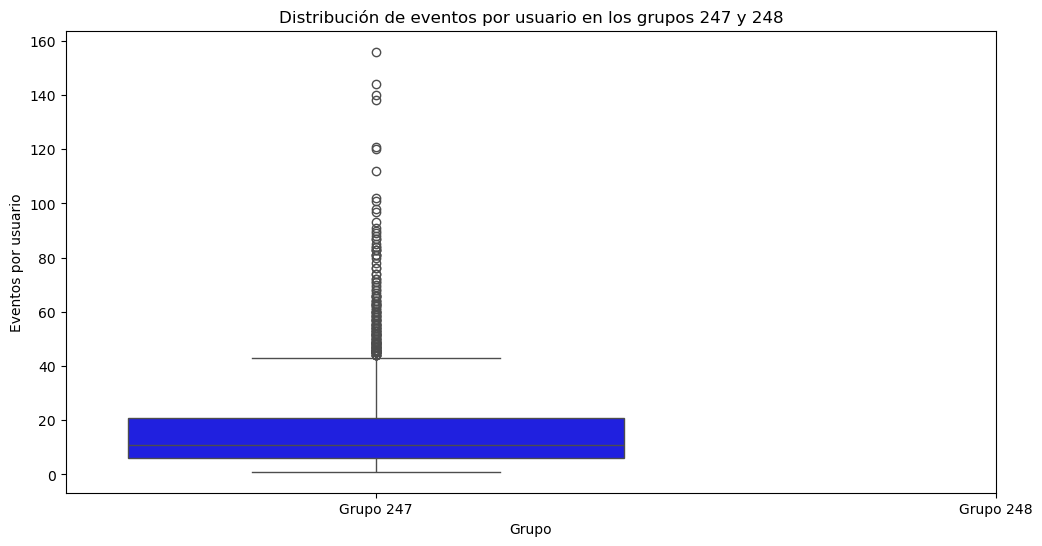

In [70]:
#insights visuales adicionales sobre la distribución de los datos
plt.figure(figsize=(12, 6))
sns.boxplot(data=[main_screen_247['device_id_hash'].value_counts(), main_screen_248['device_id_hash'].value_counts()], palette=['blue', 'orange'])
plt.title('Distribución de eventos por usuario en los grupos 247 y 248')
plt.xlabel('Grupo')
plt.ylabel('Eventos por usuario')
plt.xticks([0, 1], ['Grupo 247', 'Grupo 248'])
plt.show()

In [58]:
# Crear una funcion para continuar encontrando difrencias estadisticas entre crtl_1 y ctrl_2 con el resto de eventos
def compare_events_exptl_2(ctrl_2, expt_1, event_name):
  
    # Filtrar los registros para el evento específico
    event_ctrl_2 = ctrl_2[ctrl_2['event_name'] == event_name]
    event_expt_1 = expt_1[expt_1['event_name'] == event_name]

    # Contar el número de usuarios únicos en cada grupo que realizaron el evento
    users_event_ctrl_2 = event_ctrl_2['device_id_hash'].nunique()
    users_event_expt_1 = event_expt_1['device_id_hash'].nunique()

    print(f"Cantidad de usuarios en el grupo 246 que realizaron '{event_name}': {users_event_ctrl_2}")
    print(f"Cantidad de usuarios en el grupo 248 que realizaron '{event_name}': {users_event_expt_1}")

    # Calcular la proporción de usuarios que realizaron el evento en cada grupo de control
    proportion_event_ctrl_2 = users_event_ctrl_2 / users_247 if users_247 > 0 else 0
    proportion_event_expt_1 = users_event_expt_1 / users_248 if users_248 > 0 else 0

    print(f"Proporción de usuarios que realizaron '{event_name}' en el grupo 247: {proportion_event_ctrl_2:.2%}")
    print(f"Proporción de usuarios que realizaron '{event_name}' en el grupo 248: {proportion_event_expt_1:.2%}")

    # Hacer una prueba de hipótesis para comparar el número de usuarios que realizaron el evento en los dos grupos de control
    alpha = 0.05
    u_stat_event, p_value_event = stats.mannwhitneyu(
        event_ctrl_2['device_id_hash'].value_counts(),
        event_expt_1['device_id_hash'].value_counts(),
        alternative='two-sided'
    )
    
    print(f"Valor p de la prueba de Mann-Withney {p_value_event:.4f}")
    # Interpretar el valor p de la prueba de Mann-Whitney U para el evento
    if p_value_event < alpha:
        print(f"Hay una diferencia estadísticamente significativa en la cantidad de usuarios que realizaron '{event_name}' entre los grupos 247 y 248.")
    else:
        print(f"No hay una diferencia estadísticamente significativa en la cantidad de usuarios que realizaron '{event_name}' entre los grupos 247 y 248.")

In [59]:
#Llamar a la función para comparar eventos específicos
events_to_compare = [
    'OffersScreenAppear',
    'CartScreenAppear',
    'PaymentScreenSuccessful'
]
for event in events_to_compare:
    print(f"\nComparando el evento: {event}")
    # Check if both groups have users for this event before calling compare_events
    n1 = ctrl_2[ctrl_2['event_name'] == event]['device_id_hash'].nunique()
    n2 = expt_1[expt_1['event_name'] == event]['device_id_hash'].nunique()
    if n1 == 0 or n2 == 0:
        print(f"Uno de los grupos no tiene usuarios para el evento '{event}'. Se omite la comparación.")
        continue
    compare_events_exptl_2(ctrl_2, expt_1, event)


Comparando el evento: OffersScreenAppear
Cantidad de usuarios en el grupo 246 que realizaron 'OffersScreenAppear': 1520
Cantidad de usuarios en el grupo 248 que realizaron 'OffersScreenAppear': 1531
Proporción de usuarios que realizaron 'OffersScreenAppear' en el grupo 247: 60.49%
Proporción de usuarios que realizaron 'OffersScreenAppear' en el grupo 248: 60.35%
Valor p de la prueba de Mann-Withney 0.8849
No hay una diferencia estadísticamente significativa en la cantidad de usuarios que realizaron 'OffersScreenAppear' entre los grupos 247 y 248.

Comparando el evento: CartScreenAppear
Cantidad de usuarios en el grupo 246 que realizaron 'CartScreenAppear': 1238
Cantidad de usuarios en el grupo 248 que realizaron 'CartScreenAppear': 1230
Proporción de usuarios que realizaron 'CartScreenAppear' en el grupo 247: 49.26%
Proporción de usuarios que realizaron 'CartScreenAppear' en el grupo 248: 48.48%
Valor p de la prueba de Mann-Withney 0.0137
Hay una diferencia estadísticamente significat

Los resultados son claros con los parámetros estadísticos medidos, no es posible encontrar una diferencia estadísitcamente significatica entre nínguno de los grupos control y el grupo experimental.

Ahora procedere a hacer el analisis dcombinado de los grupos control, que en teoria al tener una mayor cantidad de usarios con respecto al experimental, podrian ser mas evidentes las diferencias y talvvez asi encontrar sifnificancia estadistica.

#### 5.4.1.2 Analisis combinado de los grupos control vs grupo experiemental 

Primero al igual que con el grupo experimental previamente en este kilometrico trabajo, creemos las variables necesarias del grupo control combinado

In [60]:
# combinar los usarios unicos del grupo control 246 y 247
combined_users = pd.concat([ctrl_1['device_id_hash'], ctrl_2['device_id_hash']]).unique()
# Calcular el número de usuarios únicos en el grupo combinado
combined_users_count = len(combined_users)
print(f"Número de usuarios únicos en el grupo combinado (246 y 247): {combined_users_count}")

Número de usuarios únicos en el grupo combinado (246 y 247): 4997


Primero veamos si hay diferencia en el tamaño de los grupos entre el combinado de control y el experiemental

In [61]:
# prueba de hipotesis para comparar los tamaños de las muestars del grupo combinado con el grupo experimental 248
alpha = 0.05
u_stat_combined, p_value_combined = stats.mannwhitneyu(
    combined_users,
    sample_B1['device_id_hash'].value_counts(),
    alternative='two-sided'
)
print(f"Valor p de la prueba de Mann-Whitney para el grupo combinado: {p_value_combined:.30f}")
# Interpretar el valor p de la prueba de Mann-Whitney U para el grupo combinado
if p_value_combined < alpha:
    print("Hay una diferencia estadísticamente significativa entre el grupo combinado (246 y 247) y el grupo experimental 248.")
else:
    print("No hay una diferencia estadísticamente significativa entre el grupo combinado (246 y 247) y el grupo experimental 248.")

Valor p de la prueba de Mann-Whitney para el grupo combinado: 0.000000000000000000000000000000
Hay una diferencia estadísticamente significativa entre el grupo combinado (246 y 247) y el grupo experimental 248.


Como era de esperarse la diferencia entre el tamaño de grupos es muy grande y alcanzamos una diferencia significativa entre ambos grupos 

In [62]:
# Calcular la proporción de usuarios que realizaron 'MainScreenAppear' en el grupo combinado
main_screen_combined = logs_filtered[logs_filtered['event_name'] == 'MainScreenAppear']
users_main_screen_combined = main_screen_combined['device_id_hash'].nunique()
proportion_main_screen_combined = users_main_screen_combined / combined_users_count if combined_users_count > 0 else 0
print(f"Proporción de usuarios que realizaron 'MainScreenAppear' en el grupo combinado (246 y 247): {proportion_main_screen_combined:.2%}")


Proporción de usuarios que realizaron 'MainScreenAppear' en el grupo combinado (246 y 247): 148.47%


Obiamente es mayor al 100% porque en este caso estamos sumando ambas proporciones de cada grupo

Ahora veamos si estas diferencias se extienden a las etapas del embudo empezando por la primera 

Valor p de la prueba de Mann-Whitney para el grupo combinado y el grupo experimental 248: 0.2422
No hay una diferencia estadísticamente significativa en la cantidad de usuarios que realizaron 'MainScreenAppear' entre el grupo combinado (246 y 247) y el grupo experimental 248.


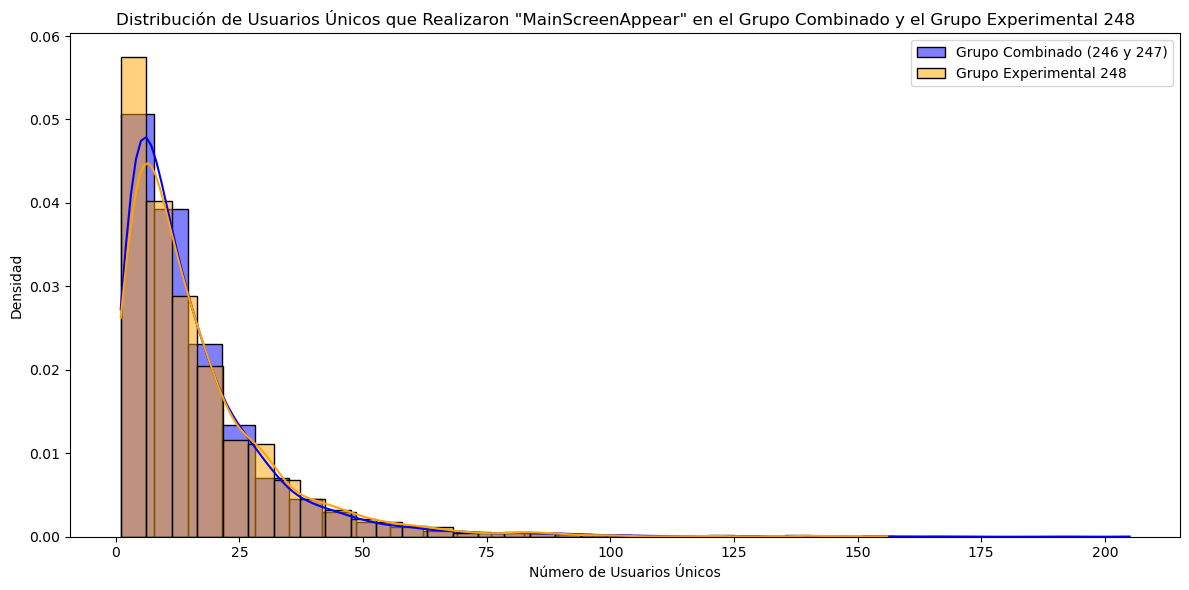

In [63]:
# prueba de hipotesis para comparar el grupo combinado con el grupo experimental 248
alpha = 0.05
u_stat_combined, p_value_combined = stats.mannwhitneyu(
    main_screen_combined['device_id_hash'].value_counts(),
    main_screen_248['device_id_hash'].value_counts(),
    alternative='two-sided'
)
print(f"Valor p de la prueba de Mann-Whitney para el grupo combinado y el grupo experimental 248: {p_value_combined:.4f}")
# Interpretar el valor p de la prueba de Mann-Whitney U para 'MainScreenAppear' entre el grupo combinado y el grupo experimental 248
if p_value_combined < alpha:
    print("Hay una diferencia estadísticamente significativa en la cantidad de usuarios que realizaron 'MainScreenAppear' entre el grupo combinado (246 y 247) y el grupo experimental 248.")
else:
    print("No hay una diferencia estadísticamente significativa en la cantidad de usuarios que realizaron 'MainScreenAppear' entre el grupo combinado (246 y 247) y el grupo experimental 248.")
# Visualizar la distribución de usuarios únicos que realizaron 'MainScreenAppear' en el grupo combinado y el grupo experimental 248
plt.figure(figsize=(12, 6))
sns.histplot(main_screen_combined['device_id_hash'].value_counts(), bins=30, kde=True, color='blue', label='Grupo Combinado (246 y 247)', stat='density')
sns.histplot(main_screen_248['device_id_hash'].value_counts(), bins=30, kde=True, color='orange', label='Grupo Experimental 248', stat='density')
plt.title('Distribución de Usuarios Únicos que Realizaron "MainScreenAppear" en el Grupo Combinado y el Grupo Experimental 248')
plt.xlabel('Número de Usuarios Únicos')
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()


Sorpresivamente no hay diferencias estadisticas entre los grupos aunque el valor p es mucho menor al resto de pruebas realizadas entre cada grupo control y el experimental aun no tenemos significancia estadistica

Ahora comparemos el resto de las etapas 

In [64]:
# crear una funcion para continuar encontrando difrencias estadisticas entre el grupo combinado y el grupo experimental 248 con el resto de eventos
def compare_events_combined_exptl(combined_users, expt_1, event_name):
  
    # Filtrar los registros para el evento específico
    event_combined = logs_filtered[logs_filtered['event_name'] == event_name]
    event_expt_1 = expt_1[expt_1['event_name'] == event_name]

    # Contar el número de usuarios únicos en cada grupo que realizaron el evento
    users_event_combined = event_combined['device_id_hash'].nunique()
    users_event_expt_1 = event_expt_1['device_id_hash'].nunique()

    print(f"Cantidad de usuarios en el grupo combinado (246 y 247) que realizaron '{event_name}': {users_event_combined}")
    print(f"Cantidad de usuarios en el grupo experimental 248 que realizaron '{event_name}': {users_event_expt_1}")

    # Calcular la proporción de usuarios que realizaron el evento en cada grupo
    proportion_event_combined = users_event_combined / combined_users_count if combined_users_count > 0 else 0
    proportion_event_expt_1 = users_event_expt_1 / users_248 if users_248 > 0 else 0

    print(f"Proporción de usuarios que realizaron '{event_name}' en el grupo combinado (246 y 247): {proportion_event_combined:.2%}")
    print(f"Proporción de usuarios que realizaron '{event_name}' en el grupo experimental 248: {proportion_event_expt_1:.2%}")

    # Hacer una prueba de hipótesis para comparar el número de usuarios que realizaron el evento en los dos grupos
    alpha = 0.05
    u_stat_event, p_value_event = stats.mannwhitneyu(
        event_combined['device_id_hash'].value_counts(),
        event_expt_1['device_id_hash'].value_counts(),
        alternative='two-sided'
    )
    
    print(f"Valor p de la prueba de Mann-Withney {p_value_event:.4f}")
    # Interpretar el valor p de la prueba de Mann-Whitney U para el evento
    if p_value_event < alpha:
        print(f"Hay una diferencia estadísticamente significativa en la cantidad de usuarios que realizaron '{event_name}' entre el grupo combinado (246 y 247) y el grupo experimental 248.")
    else:
        print(f"No hay una diferencia estadísticamente significativa en la cantidad de usuarios que realizaron '{event_name}' entre el grupo combinado (246 y 247) y el grupo experimental 248.")
        

In [65]:
#llamar a la función para comparar eventos específicos
events_to_compare = [
    'OffersScreenAppear',
    'CartScreenAppear',
    'PaymentScreenSuccessful'
]
for event in events_to_compare:
    print(f"\nComparando el evento: {event}")
    # Check if both groups have users for this event before calling compare_events
    n1 = logs_filtered[logs_filtered['event_name'] == event]['device_id_hash'].nunique()
    n2 = expt_1[expt_1['event_name'] == event]['device_id_hash'].nunique()
    if n1 == 0 or n2 == 0:
        print(f"Uno de los grupos no tiene usuarios para el evento '{event}'. Se omite la comparación.")
        continue
    compare_events_combined_exptl(combined_users, expt_1, event)


Comparando el evento: OffersScreenAppear
Cantidad de usuarios en el grupo combinado (246 y 247) que realizaron 'OffersScreenAppear': 4593
Cantidad de usuarios en el grupo experimental 248 que realizaron 'OffersScreenAppear': 1531
Proporción de usuarios que realizaron 'OffersScreenAppear' en el grupo combinado (246 y 247): 91.92%
Proporción de usuarios que realizaron 'OffersScreenAppear' en el grupo experimental 248: 60.35%
Valor p de la prueba de Mann-Withney 0.8379
No hay una diferencia estadísticamente significativa en la cantidad de usuarios que realizaron 'OffersScreenAppear' entre el grupo combinado (246 y 247) y el grupo experimental 248.

Comparando el evento: CartScreenAppear
Cantidad de usuarios en el grupo combinado (246 y 247) que realizaron 'CartScreenAppear': 3734
Cantidad de usuarios en el grupo experimental 248 que realizaron 'CartScreenAppear': 1230
Proporción de usuarios que realizaron 'CartScreenAppear' en el grupo combinado (246 y 247): 74.72%
Proporción de usuarios

A pesar de que las proporciones tienen diferencias muy marcadas entre el grupo combinado y el experiemntal por la diferencia de tamaños.No tenemos significancia estadistica en entre la cantidad de usarios que llegaron a cada etapa entre los grupos, vaya resultado sorpresivo.

Lo unico que queda por hacer es modificar e nivel de significancia de las pruebas para ver si solo asi es possible alcanzar significancia estadiatica


# 6 Resultados con un alpha = 0.01 

En vez de llenar celdas y celdas y celdas de texto, con la comparación entre los grupos crearé un nuevo DataFrame con los resultados de las pruebas estadisticas, ya que, el resultado es teoricamente el mismo lo único que cambiara es si existe o no significancia entre los datos

In [66]:
# Nuwvo DataFrame
df= pd.DataFrame(columns=['etapa','a1_vs_a2_.05', 'a1_vs_a2_.01', 'a1_vs_b1_.05', 'a1_vs_b1_.01',
                        'a2_vs_b1_.05', 'a2_vs_b1_.01', 'combined_vs_b1_.05', 'combined_vs_b1_.01'])
df['etapa']= ['Group_size','MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
df['a1_vs_a2_.05'] = 0.8722, 0.8722, 0.8436, 0.4601, 0.4063
df['a1_vs_a2_.01'] = 0.8722, 0.8722, 0.8436, 0.4601, 0.4063
df['a1_vs_b1_.05'] = 0.4263, 0.3308, 0.7226, 0.0949, 0.5662
df['a1_vs_b1_.01'] = 0.4263, 0.3308, 0.7226, 0.0949, 0.5662
df['a2_vs_b1_.05'] = 0.3308, 0.3308, 0.8849, 0.0137, 0.1525
df['a2_vs_b1_.01'] = 0.3308, 0.3308, 0.8849, 0.0137, 0.1525
df['combined_vs_b1_.05'] = 0.0000, 0.2422, 0.8379, 0.0910, 0.4160
df['combined_vs_b1_.01'] = 0.0000, 0.2422, 0.8379, 0.0910, 0.4160

# Mostrar el DataFrame con los resultados de las pruebas de hipótesis
print("\nResultados de las pruebas de hipótesis:")

display (df)


Resultados de las pruebas de hipótesis:


,etapa,a1_vs_a2_.05,a1_vs_a2_.01,a1_vs_b1_.05,a1_vs_b1_.01,a2_vs_b1_.05,a2_vs_b1_.01,combined_vs_b1_.05,combined_vs_b1_.01
0,Group_size,0.8722,0.8722,0.4263,0.4263,0.3308,0.3308,0.0000,0.0000
1,MainScreenAppear,0.8722,0.8722,0.3308,0.3308,0.3308,0.3308,0.2422,0.2422
2,OffersScreenAppear,0.8436,0.8436,0.7226,0.7226,0.8849,0.8849,0.8379,0.8379
3,CartScreenAppear,0.4601,0.4601,0.0949,0.0949,0.0137,0.0137,0.0910,0.0910
4,PaymentScreenSuccessful,0.4063,0.4063,0.5662,0.5662,0.1525,0.1525,0.4160,0.4160



Cabe resaltar que incluso con una significancia de **alpha = 0.01** solo se alcanzo una diferencia estadsitica significativa entre los usarios del grupo control 2  y el experimental que llegaron a la pagina CartScreenAppear con un valor de p: **0.0137**	
No menciono la diferencia estadisitica que existe entre el tamaño de los grupos control combinados y el grupo experimenta, ya que es mas que obvio, la diferencia de tamaños era abismal en tamaño crudo de usarios.
Para hacer la comparacion entre los valores p de los grupos mas visual hagamos una grafica para que se puedan comparar los grupos y valores deseados

In [67]:
# Derretir el DataFrame para que sea compatible con Plotly
df_melted = df.melt('etapa', var_name='Prueba', value_name='Valor P')

# Crear el gráfico de barras interactivo con Plotly Express
fig = px.bar(df_melted, x='etapa', y='Valor P', color='Prueba', barmode='group',
             title='Resultados de las pruebas de hipótesis por Etapa',
             labels={'etapa': 'Etapa del embudo', 'Valor P': 'Valor P'})

# Personalizar el diseño del gráfico
fig.update_layout(
    xaxis_title='Etapa del embudo',
    yaxis_title='Valor P',
    legend_title='Prueba de Hipótesis',
    hovermode='x unified'
)

# Mostrar el gráfico
fig.show()

# Conclusion
En conclusión el cambio de fuente no parece afectar para nada las ventas del sitio, puede ser que mientras la fuente sea legible, esta no ntiene impacto alguno en las compras, o que, la gente este tan habituada al sitio que no importe el cambio de fuente. Esto ultimo puede ser muy cierto y puede ser la explicacioó también del porque la etapa de tutorial es tan baja con respecto al resto de etapas